In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from common import Fonts, Images, NWSL, Colors, add_signature

In [2]:
df = pd.read_csv("final.csv")
df

,team,season,points
0,BOS,2013,"[1, 4, 7, 8, 8, 8, 11, 11, 12, 15, 18, 21, 22,..."
1,CHI,2013,"[1, 1, 1, 4, 4, 5, 8, 9, 12, 15, 16, 16, 17, 1..."
2,KC,2013,"[1, 4, 7, 7, 7, 10, 13, 14, 17, 20, 20, 23, 23..."
3,NJNY,2013,"[3, 4, 7, 10, 10, 11, 12, 15, 16, 16, 19, 22, ..."
4,POR,2013,"[3, 3, 6, 6, 9, 12, 12, 13, 14, 17, 17, 18, 21..."
...,...,...,...
107,POR,2024,"[0, 1, 4, 7, 10, 13, 13, 16, 16, 16, 16, 19, 2..."
108,RGN,2024,"[3, 3, 6, 7, 7, 8, 9, 10, 13, 13, 13, 13, 16, ..."
109,SD,2024,"[0, 3, 6, 9, 10, 11, 11, 11, 12, 12, 15, 15, 1..."
110,UTA,2024,"[0, 3, 3, 4, 4, 4, 4, 5, 8, 8, 11, 14, 14, 14,..."


In [3]:
halfway = False

In [4]:
results = pd.DataFrame([], columns=["season", "best", "worst"])
for season in df["season"].unique():
    best = 0
    worst = 1
    data = df[df["season"] == season]
    for team in data["team"].unique():
        points = list(
            map(int, data[data["team"] == team]["points"].iloc[0][1:-1].split(", "))
        )

        idx = int(len(points) / 2) - 1 if halfway else int(len(points)) - 1
        val = points[idx] / (3 * len(points) / (2 if halfway else 1))
        if val > best:
            best = val
        if val < worst:
            worst = val

    results.loc[len(results.index)] = [season, best, worst]

results["season"] = results["season"].astype(int)

<Figure size 432x288 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

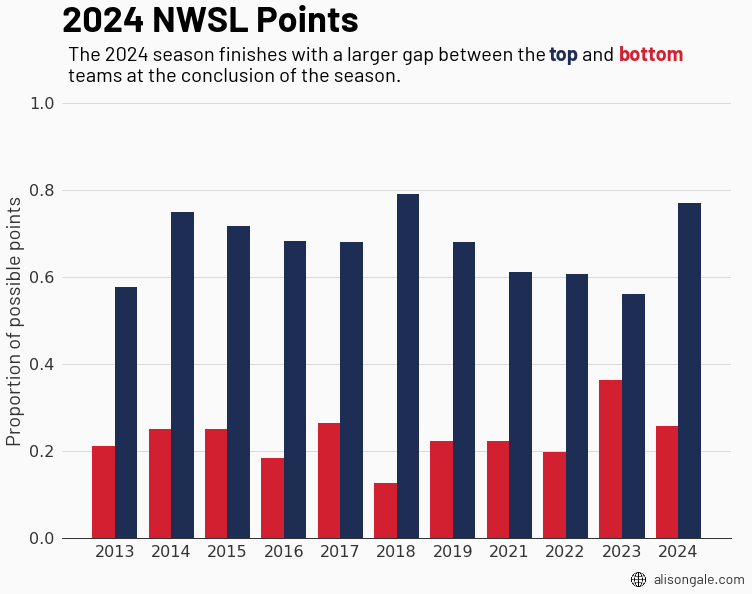

In [5]:
season = "2024"

plt.clf()
plt.rcParams["figure.figsize"] = (12, 8)
plt.figure(dpi=200, facecolor=Colors.WHITE)
fig, ax = plt.subplots()
fig.patch.set_facecolor(Colors.WHITE)
ax.set_facecolor(Colors.WHITE)

best = "#1d2d53"
worst = "#d22030"

plt.bar(results.index - 0.2, results["worst"], 0.4, color=worst)
plt.bar(results.index + 0.2, results["best"], 0.4, color = best)

# Axes and ticks
ax.spines[["top", "left", "right"]].set_visible(False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color=Colors.LIGHT_GRAY)
ax.tick_params(axis="both", which="major", labelsize=16, labelcolor=Colors.BLACK)
ax.tick_params(bottom=False, left=False)
ax.set_ylim([0, 1])
ax.set_xticks(results.index)
ax.set_xticklabels(results["season"])
ax.set_ylabel("Proportion of possible points", fontproperties=Fonts.BARLOW,
    size=20, color=Colors.BLACK)

# Title
ax.set_title(
    season + " NWSL Points",
    fontproperties=Fonts.BARLOW_BOLD,
    size=36,
    ha="left",
    x=0,
    y=1.15,
)

# Subtitle
ax.text(
    -0.82,
    1.05,
    "The 2024 season finishes with a larger gap between the         and                 \nteams at the conclusion of the season.",
    fontproperties=Fonts.BARLOW,
    size=20,
    ha="left",
)

plt.figtext(
    0.688,
    0.954,
    "top",
    fontproperties=Fonts.BARLOW_BOLD,
    fontsize=20,
    color=best,
)

plt.figtext(
    0.77,
    0.954,
    "bottom",
    fontproperties=Fonts.BARLOW_BOLD,
    fontsize=20,
    color=worst,
)

add_signature(fig, x=0.78, y=0.04, fs=14, w=0.025)

# Save image
plt.savefig(
    "best_worst_" + season + ".png" if halfway else "best_worst_" + season + ".png",
    bbox_inches="tight",
    transparent=False,
    pad_inches=0.5,
    dpi=200,
)